## 4 Simulation experiments on the impact of $L$ and strategies
### 4.1 Signals study

In [1]:
import os
path_y = os.getcwd() + '/results/y/'
path_true_x = os.getcwd() + '/results/true_x/'
path_res = os.getcwd() + '/results/res/'

os.chdir('../')
from inference_mahmm import *

import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm 

palette = sns.color_palette("tab10", 10)

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


##### Results recuperation

In [2]:
Σ, seeds, L = [0.01, 0.02, 0.04, 0.06, 0.08, 0.1], np.arange(1000), [0, 2, 5, 8, 10]
fees = [0, 0.0005, 0.001, 0.002]

In [3]:
acc = np.zeros((len(Σ), len(seeds), len(L)))
rcr = np.zeros((len(Σ), len(seeds), len(L)))
d = np.zeros((len(Σ), len(seeds), len(L)))
baf = np.zeros((len(Σ), len(seeds), len(L)))

sick_seeds = []

for si, σ in enumerate(Σ):
    for seed in tqdm(seeds):
        
        y = np.asarray(np.load(path_y + 'y_sigma' + str(σ) + '_' + str(seed) + '.npy', 'r'))
        true_x = np.asarray(np.load(path_true_x + 'true_x_' + str(seed) + '.npy', 'r'))
        
        for li, l in enumerate(L):
                with open(path_res + 'res_up_L' + str(l) + '_sigma' + str(σ) + '_' + str(seed) + '.pickle', 'rb') as handle:
                    res = pickle.load(handle)
                
                x_c = res['x_c']
                x = res['x_b']

                acc[si, seed, li] = compute_accuracy(x, true_x[-len(x):])
                rcr[si, seed, li] = compute_shift_rate(x)
                d[si, seed, li] = compute_average_length_states(x)
                baf[si, seed, li] = compute_back_and_forth_rate(x)

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

##### Accuracy

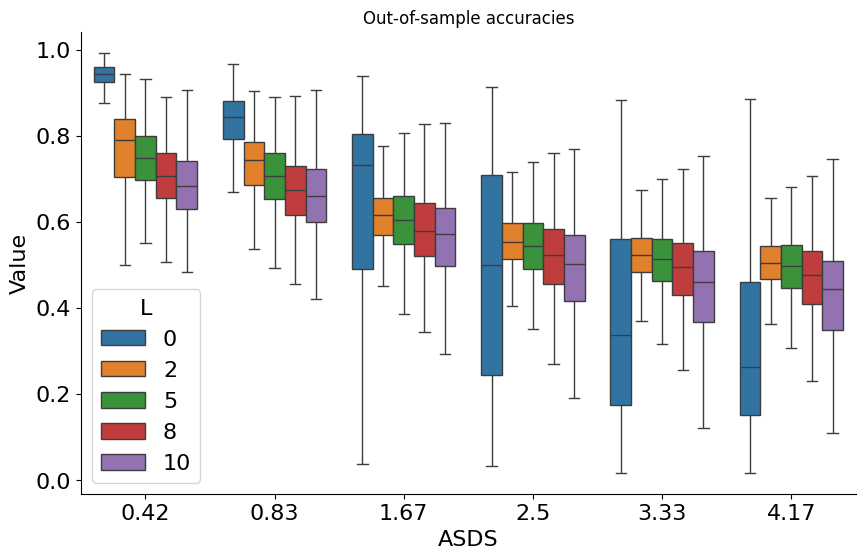

In [4]:
ft = 16

df_melted = pd.DataFrame([[l, σ, acc[si, seedi, li]] for si, σ in enumerate(Σ) for seedi, seed in enumerate(seeds) for li, l in enumerate(L)])
df_melted.columns = ['L', 'Sigma', 'Value']
df_melted['di'] = [np.round(((s/0.04)+(s/0.02)+(s/0.02))/3, 2) for s in df_melted['Sigma']]

fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(y='Value', x='di', hue='L', data=df_melted, dodge=True, palette = palette, showfliers=False)
plt.xlabel("ASDS", fontsize=ft)
plt.ylabel('Value', fontsize=ft)
plt.xticks(fontsize=ft)
plt.yticks(fontsize=ft)
plt.legend(fontsize=ft, title_fontsize=ft, title="L")
plt.title('Out-of-sample accuracies')
sns.despine()
plt.show()

#### Average state duration

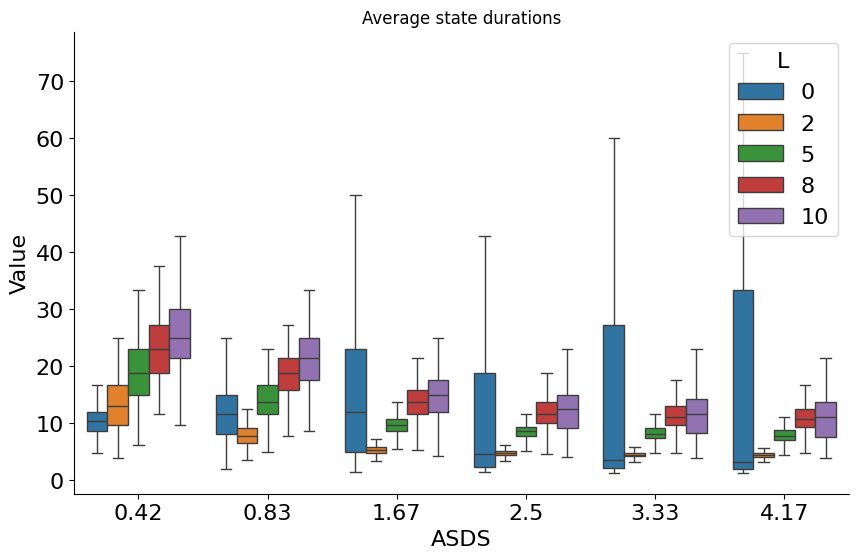

In [5]:
df_melted = pd.DataFrame([[l, σ, d[si, seedi, li]] for si, σ in enumerate(Σ) for seedi, seed in enumerate(seeds) for li, l in enumerate(L)])
df_melted.columns = ['L', 'Sigma', 'Value']
df_melted['di'] = [np.round(((s/0.04)+(s/0.02)+(s/0.02))/3, 2) for s in df_melted['Sigma']]

fig, ax = plt.subplots(figsize=(10, 6))
gfg = sns.boxplot(y='Value', x='di', hue='L', data=df_melted, dodge=True, palette = palette, showfliers=False)
plt.xlabel("ASDS", fontsize=ft)
plt.ylabel('Value', fontsize=ft)
plt.xticks(fontsize=ft)
plt.yticks(fontsize=ft)
plt.legend(fontsize=ft, title_fontsize=ft, title="L")
plt.title('Average state durations')
sns.despine()
plt.show()

##### Back-and-forth shifting rate

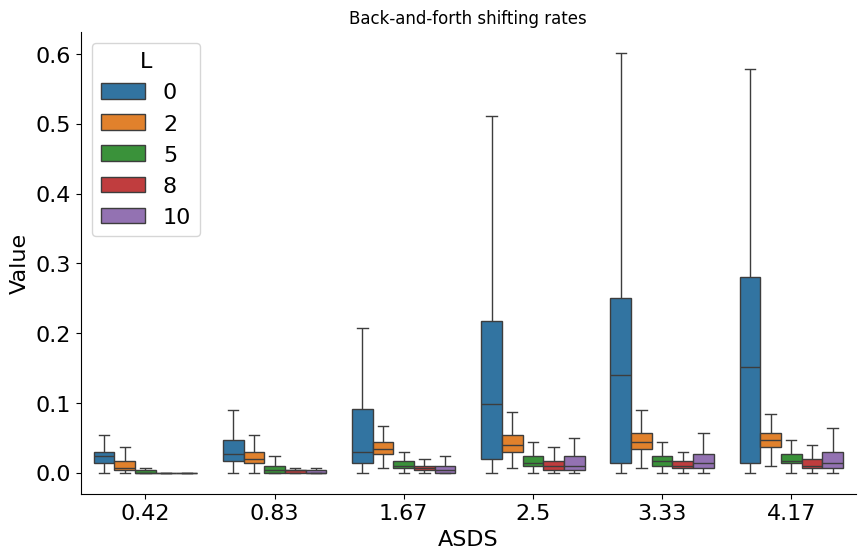

In [6]:
df_melted = pd.DataFrame([[l, σ, baf[si, seedi, li]] for si, σ in enumerate(Σ) for seedi, seed in enumerate(seeds) for li, l in enumerate(L)])
df_melted.columns = ['L', 'Sigma', 'Value']
df_melted['di'] = [np.round(((s/0.04)+(s/0.02)+(s/0.02))/3, 2) for s in df_melted['Sigma']]

fig, ax = plt.subplots(figsize=(10, 6))
gfg = sns.boxplot(y='Value', x='di', hue='L', data=df_melted, dodge=True, palette = palette, showfliers=False)

plt.xlabel("ASDS", fontsize=ft)
plt.ylabel('Value', fontsize=ft)
plt.xticks(fontsize=ft)
plt.yticks(fontsize=ft)
plt.legend(fontsize=ft, title_fontsize=ft, title="L")

plt.title('Back-and-forth shifting rates')
sns.despine()
plt.show()